In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import haversine as hs
import folium
from IPython.display import display
import gpxpy.gpx
import os
import requests
import datetime


# Einstellung der Konfigurierung der plots
plt.rcParams['figure.figsize'] = (16, 6)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

# Auswertung der GPX Files

In [2]:
# Lese probeweise das GPX File eines Tages ein und speichere es in "gpx"
with open('Workout-2022-11-08-08-36-39.gpx', 'r') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [3]:
# Erstelle eine Liste, in der alle Datenpunkte des GPX Files angehängt werden
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'Breitengrad': point.latitude,
                'Längengrad': point.longitude,
                'Höhe': point.elevation
            })
            
# Erstelle aus der Liste eine Dataframe und zeige die ersten Einträge
route_df = pd.DataFrame(route_info)
route_df.head()

,Breitengrad,Längengrad,Höhe
0,51.256495,7.146197,189.0
1,51.256495,7.146197,189.0
2,51.256592,7.146236,190.0
3,51.256500,7.146219,190.0
4,51.256498,7.146240,190.0


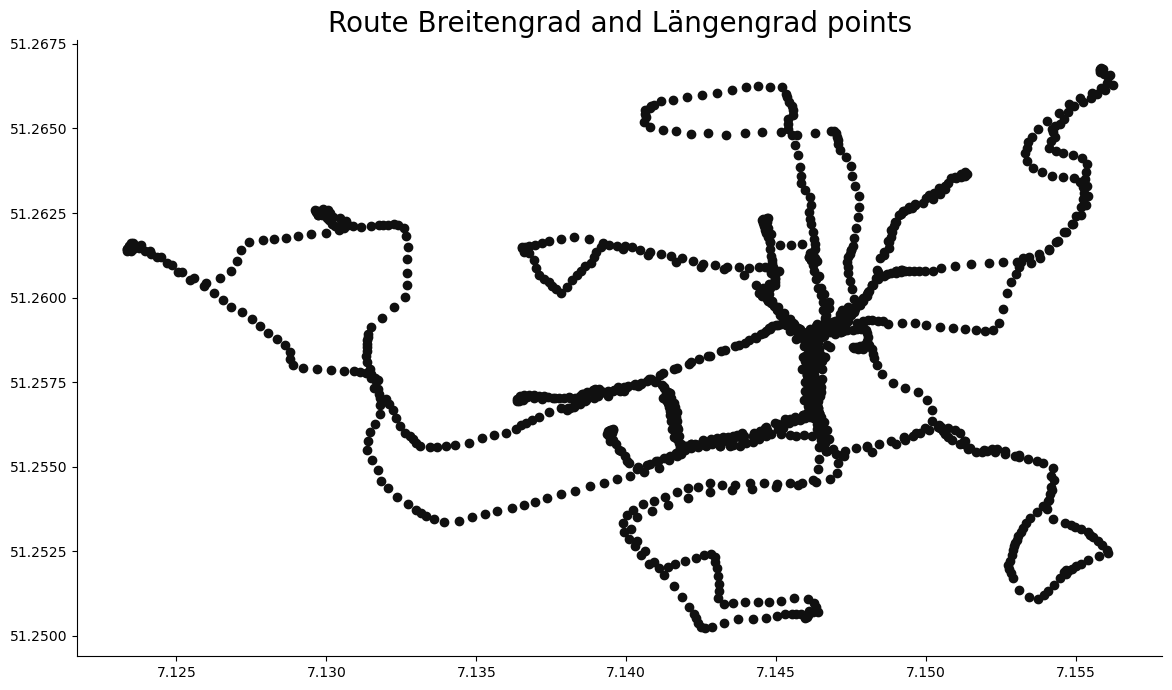

In [4]:
# Plotte die Gpx Datenpunkte anhand von Höhengrad und Breitengrad
plt.figure(figsize=(14, 8))
plt.scatter(route_df['Längengrad'], route_df['Breitengrad'], color='#101010')
plt.title('Route Breitengrad and Längengrad points', size=20);

Bis hierhin wurde sichergestellt, dass die Daten eingelesen werden können und auch Datenpunkte enthalten.

Nun soll mit Folium eine interaktive Map für die GeoDaten angelegt werden.

In [5]:
# Nun zeige mir die selben Punkte mittels Foliums interaktiven Map an.
# Dafür erstelle erstmal die Map zentriert um den Starthub in Elberfeld.
# Füge dann die Punkte hinzu.

route_map = folium.Map(
    location=[51.25662,7.14604],
    zoom_start=14,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

for _, row in route_df.iterrows():
    folium.CircleMarker(
        location=[row['Breitengrad'], row['Längengrad']],
        radius=2,
    ).add_to(route_map)

display(route_map)

In [6]:
# Tue dasselbe wie oben, allerdings nicht mit einzelnen Datenpunkten, sondern mit einem Polyline, also einer Linie, 
# die die Punkte annähernd verbindet.

route_map = folium.Map(
    location=[51.25662,7.14604],
    zoom_start=14,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['Breitengrad', 'Längengrad']].to_numpy()]
folium.PolyLine(coordinates, color='blue', weight=2).add_to(route_map)

display(route_map)

Alle Daten in ein Dataframe einspeisen. Dafür gpx files von einem Tag zusammenfassen.

In [7]:
# Pfad zum Ordner mit GPX-Dateien
folder_path = r'C:\Users\Local User\Documents\Python_Programme\Flink'

# Leere Liste, die später die Daten aus allen GPX-Dateien enthalten wird
gpx_data = []

# Durchlaufe alle GPX-Dateien im angegebenen Ordner
for filename in os.listdir(folder_path):
    if filename.endswith('.gpx'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r') as f:
            gpx = gpxpy.parse(f)
        # Durchlaufe alle Tracks, Segmente und Punkte in der GPX-Datei
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    # Füge Datenpunkt zur Liste hinzu
                    gpx_data.append([filename, point.latitude, point.longitude, point.elevation, point.time])

# Erstelle DataFrame aus GPX-Daten
columns = ['File', 'Breitengrad', 'Längengrad', 'Höhe', 'Zeit']
df = pd.DataFrame(gpx_data, columns=columns)


# Zeige den DataFrame an
df

,File,Breitengrad,Längengrad,Höhe,Zeit
0,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:36:39.620000+00:00
1,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:42:22.904000+00:00
2,Workout-2022-11-08-08-36-39.gpx,51.256592,7.146236,190.0,2022-11-08 08:42:33.888000+00:00
3,Workout-2022-11-08-08-36-39.gpx,51.256500,7.146219,190.0,2022-11-08 08:42:53.922000+00:00
4,Workout-2022-11-08-08-36-39.gpx,51.256498,7.146240,190.0,2022-11-08 08:43:00.887000+00:00
...,...,...,...,...,...
48551,Workout-2023-01-18-10-58-21.gpx,51.256480,7.145904,189.0,2023-01-18 13:29:39.501000+00:00
48552,Workout-2023-01-18-10-58-21.gpx,51.256563,7.145999,189.0,2023-01-18 13:29:44.495000+00:00
48553,Workout-2023-01-18-10-58-21.gpx,51.256600,7.146132,190.0,2023-01-18 13:29:51.484000+00:00
48554,Workout-2023-01-18-10-58-21.gpx,51.256588,7.146181,191.0,2023-01-18 13:30:01.486000+00:00


In [8]:
# Erstelle Karte mit angegebenen Parametern
map = folium.Map(location=[51.25662,7.14604], zoom_start=14, tiles='OpenStreetMap',width=1024, height=600)

# Durchlaufe alle Zeilen des DataFrames
for i, row in df.iterrows():
    # Füge Marker für jeden Punkt hinzu
    folium.Marker([row['Breitengrad'], row['Längengrad']],
                  popup=str(i)).add_to(map)

# Speichere die Karte ab. Hier auskommentiert, da die Karte mit rund 40 MB sehr groß ist.
#map.save("map.html")


In [9]:
df["Höhendifferenz"] = df["Höhe"].diff()
df

,File,Breitengrad,Längengrad,Höhe,Zeit,Höhendifferenz
0,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:36:39.620000+00:00,NaN
1,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:42:22.904000+00:00,0.0
2,Workout-2022-11-08-08-36-39.gpx,51.256592,7.146236,190.0,2022-11-08 08:42:33.888000+00:00,1.0
3,Workout-2022-11-08-08-36-39.gpx,51.256500,7.146219,190.0,2022-11-08 08:42:53.922000+00:00,0.0
4,Workout-2022-11-08-08-36-39.gpx,51.256498,7.146240,190.0,2022-11-08 08:43:00.887000+00:00,0.0
...,...,...,...,...,...,...
48551,Workout-2023-01-18-10-58-21.gpx,51.256480,7.145904,189.0,2023-01-18 13:29:39.501000+00:00,0.0
48552,Workout-2023-01-18-10-58-21.gpx,51.256563,7.145999,189.0,2023-01-18 13:29:44.495000+00:00,0.0
48553,Workout-2023-01-18-10-58-21.gpx,51.256600,7.146132,190.0,2023-01-18 13:29:51.484000+00:00,1.0
48554,Workout-2023-01-18-10-58-21.gpx,51.256588,7.146181,191.0,2023-01-18 13:30:01.486000+00:00,1.0


In [10]:
# Errechnet Distanz von 2 Punkten als float
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1, lon1),
        point2=(lat2, lon2),
        unit=hs.Unit.METERS
    )
    return np.round(distance, 2)

In [11]:
#test an einem punkt
haversine_distance(
    lat1=df.iloc[1]['Breitengrad'],
    lon1=df.iloc[1]['Längengrad'],
    lat2=df.iloc[2]['Breitengrad'],
    lon2=df.iloc[2]['Längengrad']
)

11.12

In [12]:
# Errechne Distanzen zwischen Punkten

distances = [np.nan]

for i in range(len(df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1=df.iloc[i - 1]['Breitengrad'],
            lon1=df.iloc[i - 1]['Längengrad'],
            lat2=df.iloc[i]['Breitengrad'],
            lon2=df.iloc[i]['Längengrad']
        ))
        
df['Distanz'] = distances
df

,File,Breitengrad,Längengrad,Höhe,Zeit,Höhendifferenz,Distanz
0,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:36:39.620000+00:00,NaN,NaN
1,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:42:22.904000+00:00,0.0,0.00
2,Workout-2022-11-08-08-36-39.gpx,51.256592,7.146236,190.0,2022-11-08 08:42:33.888000+00:00,1.0,11.12
3,Workout-2022-11-08-08-36-39.gpx,51.256500,7.146219,190.0,2022-11-08 08:42:53.922000+00:00,0.0,10.30
4,Workout-2022-11-08-08-36-39.gpx,51.256498,7.146240,190.0,2022-11-08 08:43:00.887000+00:00,0.0,1.48
...,...,...,...,...,...,...,...
48551,Workout-2023-01-18-10-58-21.gpx,51.256480,7.145904,189.0,2023-01-18 13:29:39.501000+00:00,0.0,14.13
48552,Workout-2023-01-18-10-58-21.gpx,51.256563,7.145999,189.0,2023-01-18 13:29:44.495000+00:00,0.0,11.35
48553,Workout-2023-01-18-10-58-21.gpx,51.256600,7.146132,190.0,2023-01-18 13:29:51.484000+00:00,1.0,10.13
48554,Workout-2023-01-18-10-58-21.gpx,51.256588,7.146181,191.0,2023-01-18 13:30:01.486000+00:00,1.0,3.66


In [13]:
# Gesamte zurückgelegte Steigung
df[df['Höhendifferenz'] >= 0]['Höhendifferenz'].sum()

20209.0

In [14]:
# Gesamtes zurückgelegtes Gefälle
df[df['Höhendifferenz'] <= 0]['Höhendifferenz'].sum()

-20246.0

In [15]:
# Gesamte zurückgelegte Distanz
df['Distanz'].sum()

1229501.91

In [16]:
# Kumulative Steigung und Distanz
df['Höhe_kumuliert'] = df['Höhendifferenz'].cumsum()
df['Distanz_kumuliert'] = df['Distanz'].cumsum()

df = df.fillna(0)

df.head()


,File,Breitengrad,Längengrad,Höhe,Zeit,Höhendifferenz,Distanz,Höhe_kumuliert,Distanz_kumuliert
0,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:36:39.620000+00:00,0.0,0.00,0.0,0.00
1,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:42:22.904000+00:00,0.0,0.00,0.0,0.00
2,Workout-2022-11-08-08-36-39.gpx,51.256592,7.146236,190.0,2022-11-08 08:42:33.888000+00:00,1.0,11.12,1.0,11.12
3,Workout-2022-11-08-08-36-39.gpx,51.256500,7.146219,190.0,2022-11-08 08:42:53.922000+00:00,0.0,10.30,1.0,21.42
4,Workout-2022-11-08-08-36-39.gpx,51.256498,7.146240,190.0,2022-11-08 08:43:00.887000+00:00,0.0,1.48,1.0,22.90


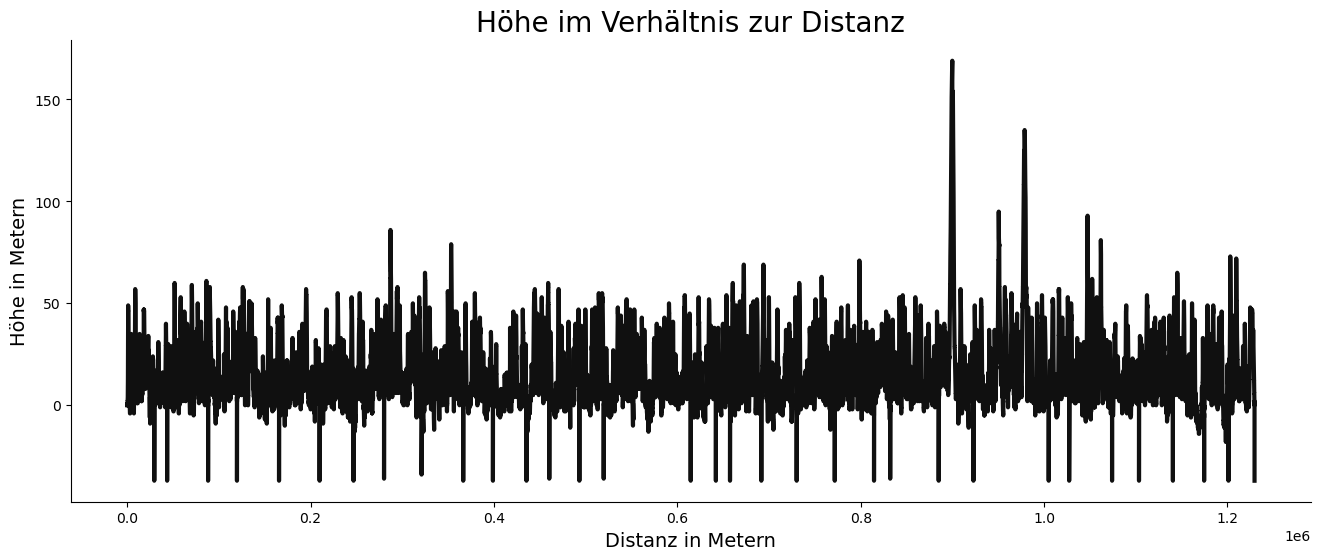

In [17]:
# Plotte die Steigung im Verhätnis zur Strecke
# Umfasst alle Fahrten über alle Tage, also begrenzt aussagekräftig
plt.plot(df['Distanz_kumuliert'], df['Höhe_kumuliert'], color='#101010', lw=3)
plt.title('Höhe im Verhältnis zur Distanz', size=20)
plt.xlabel('Distanz in Metern', size=14)
plt.ylabel('Höhe in Metern', size=14);
plt.savefig('Flink_elevation_complete.jpg', dpi=300, bbox_inches='tight')

In [18]:
# Erstelle ein df von den Daten der ersten getrackten Schicht.
df1 = df[df['File'].isin(['Workout-2022-11-08-08-36-39.gpx'])]
df1

,File,Breitengrad,Längengrad,Höhe,Zeit,Höhendifferenz,Distanz,Höhe_kumuliert,Distanz_kumuliert
0,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:36:39.620000+00:00,0.0,0.00,0.0,0.00
1,Workout-2022-11-08-08-36-39.gpx,51.256495,7.146197,189.0,2022-11-08 08:42:22.904000+00:00,0.0,0.00,0.0,0.00
2,Workout-2022-11-08-08-36-39.gpx,51.256592,7.146236,190.0,2022-11-08 08:42:33.888000+00:00,1.0,11.12,1.0,11.12
3,Workout-2022-11-08-08-36-39.gpx,51.256500,7.146219,190.0,2022-11-08 08:42:53.922000+00:00,0.0,10.30,1.0,21.42
4,Workout-2022-11-08-08-36-39.gpx,51.256498,7.146240,190.0,2022-11-08 08:43:00.887000+00:00,0.0,1.48,1.0,22.90
...,...,...,...,...,...,...,...,...,...
1326,Workout-2022-11-08-08-36-39.gpx,51.256865,7.146104,193.0,2022-11-08 13:40:26.864000+00:00,-1.0,29.62,4.0,29430.44
1327,Workout-2022-11-08-08-36-39.gpx,51.256755,7.146105,192.0,2022-11-08 13:40:51.870000+00:00,-1.0,12.23,3.0,29442.67
1328,Workout-2022-11-08-08-36-39.gpx,51.256658,7.146121,191.0,2022-11-08 13:40:54.849000+00:00,-1.0,10.84,2.0,29453.51
1329,Workout-2022-11-08-08-36-39.gpx,51.256614,7.146171,191.0,2022-11-08 13:41:09.845000+00:00,0.0,6.00,2.0,29459.51


# Graphen plotten für alle Files bzw Tage.

In [19]:
# Es gibt einige Messungenauigkeiten. Dafür werden alle mit diff unter -20 gelöscht
df["Höhe_kumuliert"] = np.where(df["Höhendifferenz"] < -20, df["Höhe_kumuliert"] - df["Höhendifferenz"], df["Höhe_kumuliert"])

df["Höhendifferenz"] = df["Höhendifferenz"].where(df["Höhendifferenz"] > -20, np.nan)

In [20]:
# Plotte die Steigung im Verhätnis zur Strecke

def steigung_plotten(df):
    df['Distanz_kumuliert'] = df['Distanz_kumuliert']-df['Distanz_kumuliert'].iloc[0]
    df['Höhe_kumuliert'] = df['Höhe_kumuliert']-df['Höhe_kumuliert'].iloc[0]
    df['Höhendifferenz'].iat[0] = 0
    df['Distanz'].iat[0] = 0
    
    plt.plot(df['Distanz_kumuliert'], df['Höhe_kumuliert'], color='#101010', lw=3)
    plt.title('Höhe im Verhältnis zur Strecke', size=20)
    plt.xlabel('Distanz in Metern', size=14)
    plt.ylabel('Höhe in Metern', size=14);
    plt.savefig(('flink_Höhe_'+df['File'].iloc[0]+'.jpg'), dpi=300, bbox_inches='tight')
    plt.close()

In [21]:
# Erstelle eine Spalte, die nur die positiven Steigungen errechnet.
df['Positive_Höhe_kumuliert'] = df[df['Höhendifferenz'] > 0]['Höhendifferenz'].cumsum()

# Setze für den ersten Wert 0 ein und fülle alle Nan mit 0 auf.
df.iat[0, df.columns.get_loc('Positive_Höhe_kumuliert')] = 0
df['Positive_Höhe_kumuliert'] = df['Positive_Höhe_kumuliert'].fillna(method='ffill')


In [22]:
# Benenne alle Files von einem Tag zum ersten Filenamen
prev_date = None
first_file_of_day = None

for i, row in df.iterrows():
    curr_date = row['Zeit'].date()
    curr_file = row['File']
    if prev_date != curr_date:
        first_file_of_day = curr_file
    else:
        df.at[i, 'File'] = first_file_of_day
    prev_date = curr_date


In [23]:
# Erstelle ein dictionary mit dem schlüsselpaar File : Dataframe
files = df['File'].unique()
dfs = {}
for file in files:
    dfs[file] = df[df['File'] == file]


In [24]:
# Grafik für alle einzelnen Schichten erstellen und abspeichern. Hier auskommentiert.
#for i in range(len(files)):
 #   steigung_plotten(dfs[files[i]])

# Als nächstes: Zusammenhang von Steigung / Trinkgeld und Distanz / Trinkgeld analysieren

In [25]:
# Liste für die Distanzen und positiven Steigungen erstellen
liste_dist = []
liste_elev = []
liste_time = []

for i in range(len(files)):
    liste_dist.append(dfs[files[i]]['Distanz_kumuliert'].iat[-1]) 
    liste_elev.append(dfs[files[i]]['Positive_Höhe_kumuliert'].iat[-1])
    liste_time.append(dfs[files[i]]['Zeit'].iat[-1])

In [26]:
# Höhe und Distanz sind bisher kumuliert. Beide sollen für jede Schicht bei 0 beginnen.
# Dafür jeweils den vorherigen Wert abziehen. Das wird hier über die Liste von hinten gemacht. Erster Wert ausgeklammert.
for i in range(len(liste_elev)):
    if i == 0:
        continue
    # Positive kumulierte Höhe zu Beginn jedes Files auf 0 setzen.
    liste_elev[-i] = liste_elev[-i] - liste_elev[-i-1]
    liste_dist[-i] = liste_dist[-i] - liste_dist[-i-1]

In [27]:
# Listen speichern
%store liste_dist liste_elev liste_time

# Als nächstes im nächsten Jupyter-Notebook weitermachen.

Stored 'liste_dist' (list)
Stored 'liste_elev' (list)
Stored 'liste_time' (list)
